In [1]:
#Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
#Draw the inferences from the clusters obtained.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from openpyxl import load_workbook

### Hierarchical Clustering

In [3]:
EW=pd.DataFrame()

In [6]:
xlfname=r"C:\Users\abhis\OneDrive\Desktop\ExcelR\EastWestAirlines.xlsx"
xl=pd.ExcelFile(xlfname)

for sheet in xl.sheet_names:
  df_tmp=xl.parse(sheet)
EW=EW.append(df_tmp,ignore_index=True,sort=False)
csvfile='sample.csv'
EW.to_csv(csvfile,index=False)
EW.head()

C:\Users\abhis\AppData\Local\Temp\ipykernel_30424\2359240087.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  EW=EW.append(df_tmp,ignore_index=True,sort=False)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
#from description we drop the telecom and CHAR columns
EW1=EW.drop(['ID#','cc1_miles','cc2_miles','cc3_miles','Days_since_enroll','Award?'],axis=1)

In [8]:
EW1

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
0,28143,0,174,1,0,0
1,19244,0,215,2,0,0
2,41354,0,4123,4,0,0
3,14776,0,500,1,0,0
4,97752,0,43300,26,2077,4
...,...,...,...,...,...,...
7993,18476,0,8525,4,200,1
7994,64385,0,981,5,0,0
7995,73597,0,25447,8,0,0
7996,54899,0,500,1,500,1


In [10]:
def func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [11]:
df=func(EW1)

In [13]:
df.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472


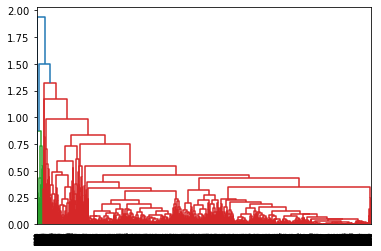

In [15]:
dendrogram=sch.dendrogram(sch.linkage(df,method='complete'))

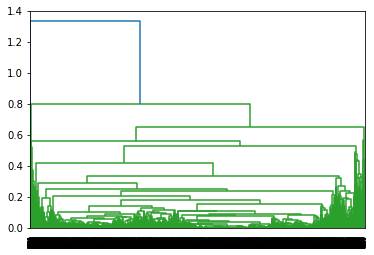

In [17]:
dendrogram=sch.dendrogram(sch.linkage(df,method='average'))

In [18]:
hc=AgglomerativeClustering(n_clusters=3,linkage='complete')

In [19]:
y=hc.fit_predict(df)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
EW1['cluster']=y
EW1

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,cluster
0,28143,0,174,1,0,0,0
1,19244,0,215,2,0,0,0
2,41354,0,4123,4,0,0,0
3,14776,0,500,1,0,0,0
4,97752,0,43300,26,2077,4,0
...,...,...,...,...,...,...,...
7993,18476,0,8525,4,200,1,0
7994,64385,0,981,5,0,0,0
7995,73597,0,25447,8,0,0,0
7996,54899,0,500,1,500,1,0


In [21]:
EW1['cluster'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
EW.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [24]:
EW1=EW.drop(['ID#'],axis=1)

In [25]:
EW1.head

<bound method NDFrame.head of       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
7993    18476           0          1          1          1         8525   
7994    64385           0          1          1          1          981   
7995    73597           0          3          1          1        25447   
7996    54899           0          1          1          1          500   
7997     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enr

In [31]:
def func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [32]:
bf=func(EW1)
bf

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7993,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
7994,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
7995,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
7996,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


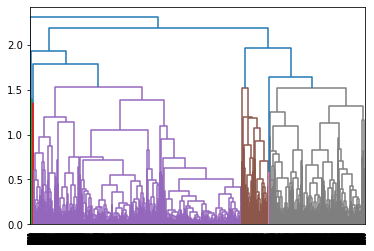

In [33]:
#dendrogram
dendrogram=sch.dendrogram(sch.linkage(bf,method='complete'))

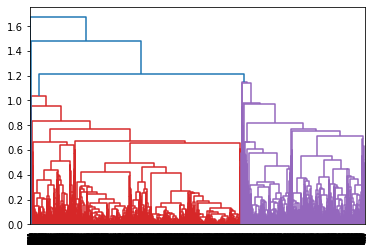

In [34]:
dendrogram=sch.dendrogram(sch.linkage(bf,method='average'))

In [35]:
yc=AgglomerativeClustering(n_clusters=8,linkage='complete')

In [36]:
f=yc.fit_predict(bf)

In [37]:
EW1['clusters']=f
EW1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7993,18476,0,1,1,1,8525,4,200,1,1403,1,0
7994,64385,0,1,1,1,981,5,0,0,1395,1,0
7995,73597,0,3,1,1,25447,8,0,0,1402,1,0
7996,54899,0,1,1,1,500,1,500,1,1401,0,2


### K-Means Clustering

In [38]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [39]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [40]:
fd=norm_func(EW1.iloc[:,1:])
fd

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.285714
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.285714
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.285714
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.285714
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.142857
...,...,...,...,...,...,...,...,...,...,...,...
7993,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0.000000
7994,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0.000000
7995,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0.000000
7996,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0.285714


Text(0, 0.5, 'wcss')

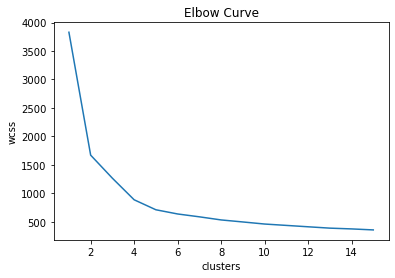

In [42]:
wcss=[]
for i in range(1,16):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(fd)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,16),wcss)
plt.title('Elbow Curve')
plt.xlabel('clusters')
plt.ylabel('wcss')

In [43]:
#from Elbow Curve we have to decide 8 clusters
m1=KMeans(n_clusters=8)
m1.fit(fd)

KMeans()

In [44]:
m1.labels_

array([7, 7, 7, ..., 6, 1, 1])

In [45]:
md=pd.Series(m1.labels_)
EW1['cluster']=md
EW1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,2,7
1,19244,0,1,1,1,215,2,0,0,6968,0,2,7
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,7
3,14776,0,1,1,1,500,1,0,0,6952,0,2,7
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,18476,0,1,1,1,8525,4,200,1,1403,1,0,4
7994,64385,0,1,1,1,981,5,0,0,1395,1,0,4
7995,73597,0,3,1,1,25447,8,0,0,1402,1,0,6
7996,54899,0,1,1,1,500,1,500,1,1401,0,2,1


In [48]:
EW1.iloc[:,1:11].groupby(EW1.cluster).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,
0,362.046154,1.156923,1.030769,1.018462,9042.529231,10.843077,1027.726154,3.280000,6066.513846,1.0
1,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
2,56.013468,3.703704,1.000000,1.026936,34050.390572,17.087542,223.037037,0.693603,6119.387205,0.0
3,299.883648,4.660377,1.000000,1.062893,70718.415094,23.317610,1077.330189,3.261006,5923.786164,1.0
4,223.591954,1.155172,1.034483,1.000000,8670.959770,10.135057,1032.341954,3.025862,2725.405172,1.0
5,89.616822,3.473520,1.003115,1.018692,28917.722741,17.367601,225.084112,0.566978,2846.809969,0.0
6,132.434694,3.432653,1.002041,1.002041,29314.585714,18.179592,477.759184,1.416327,4175.295918,1.0
7,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0


#### DBSCAN EastWest

In [49]:
from sklearn.cluster import DBSCAN

In [63]:
EW=pd.DataFrame()
xlfname=r"C:\Users\abhis\OneDrive\Desktop\ExcelR\EastWestAirlines.xlsx"
xl=pd.ExcelFile(xlfname)

for sheet in xl.sheet_names:
  df_tmp=xl.parse(sheet)
EW=EW.append(df_tmp,ignore_index=True,sort=False)
csvfile='sample.csv'
EW.to_csv(csvfile,index=False)

C:\Users\abhis\AppData\Local\Temp\ipykernel_30424\1305297064.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  EW=EW.append(df_tmp,ignore_index=True,sort=False)


In [64]:
EW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [61]:
array=EW.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [73]:
from sklearn.preprocessing import StandardScaler
stscaler=StandardScaler().fit(array)
x=stscaler.transform(array)

In [74]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [76]:
dbs=DBSCAN(eps=2,min_samples=12)
dbs.fit(x)

DBSCAN(eps=2, min_samples=12)

In [77]:
y=dbs.fit_predict(x)

In [78]:
dbs.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [79]:
cl=pd.DataFrame(y,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [80]:
pd.concat([EW,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
